In [1]:
from pymutspec import draw
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind, wilcoxon

PATH_TO_12MUTSPEC = '/home/gabs/Documents/lab/TermitesAndCockroaches/mtdna-mutspec-insecta/data/NemuPipeline/AllInsects/midori_all_insects_mutspec/ms12syn_internal_iqtree.tsv'
PATH_TO_192MUTSPEC = '/home/gabs/Documents/lab/TermitesAndCockroaches/mtdna-mutspec-insecta/data/NemuPipeline/AllInsects/midori_all_insects_mutspec/ms192syn_internal_iqtree.tsv'
PATH_TO_METADATA = '/home/gabs/Documents/lab/TermitesAndCockroaches/mtdna-mutspec-insecta/data/NemuPipeline/AllInsects/midori_all_insects_mutspec/msMetaData.tsv'
PATH_TO_CODONTABLE = '/home/gabs/Documents/lab/TermitesAndCockroaches/mtdna-mutspec-insecta/data/DescriptiveStat/codontable_midori_blattodea.csv'

In [2]:
mutspec12 = pd.read_csv(PATH_TO_12MUTSPEC, sep='\t')
mutspec192 = pd.read_csv(PATH_TO_192MUTSPEC, sep='\t')

In [3]:
# inverts nucls for ms12, need to be run only once. don't do it

a_spec = pd.concat([mutspec12[mutspec12['Mut'] == 'A>G'], mutspec12[mutspec12['Mut'] == 'A>C'], mutspec12[mutspec12['Mut'] == 'A>T']])
t_spec = pd.concat([mutspec12[mutspec12['Mut'] == 'T>G'], mutspec12[mutspec12['Mut'] == 'T>C'], mutspec12[mutspec12['Mut'] == 'T>A']])
g_spec = pd.concat([mutspec12[mutspec12['Mut'] == 'G>T'], mutspec12[mutspec12['Mut'] == 'G>C'], mutspec12[mutspec12['Mut'] == 'G>A']])
c_spec = pd.concat([mutspec12[mutspec12['Mut'] == 'C>T'], mutspec12[mutspec12['Mut'] == 'C>G'], mutspec12[mutspec12['Mut'] == 'C>A']])

a_spec.loc[a_spec['Mut'] == 'A>G', 'Mut'] = 'T>C'
a_spec.loc[a_spec['Mut'] == 'A>C', 'Mut'] = 'T>G'
a_spec.loc[a_spec['Mut'] == 'A>T', 'Mut'] = 'T>A'

t_spec.loc[t_spec['Mut'] == 'T>G', 'Mut'] = 'A>C'
t_spec.loc[t_spec['Mut'] == 'T>C', 'Mut'] = 'A>G'
t_spec.loc[t_spec['Mut'] == 'T>A', 'Mut'] = 'A>T'

g_spec.loc[g_spec['Mut'] == 'G>T', 'Mut'] = 'C>A'
g_spec.loc[g_spec['Mut'] == 'G>C', 'Mut'] = 'C>G'
g_spec.loc[g_spec['Mut'] == 'G>A', 'Mut'] = 'C>T'

c_spec.loc[c_spec['Mut'] == 'C>T', 'Mut'] = 'G>A'
c_spec.loc[c_spec['Mut'] == 'C>G', 'Mut'] = 'G>C'
c_spec.loc[c_spec['Mut'] == 'C>A', 'Mut'] = 'G>T'

mutspec12 = pd.concat([a_spec, t_spec, g_spec, c_spec]).sort_values(by=['Species', 'Mut'])


In [23]:
#filter by ObsNum and ExpNum
mutspec12.loc[mutspec12['ObsNum'] < 1, 'ObsNum'] = 0
mutspec12.loc[mutspec12['ExpNum'] < 1, 'ExpNum'] = 0
mutspec12['MutSpec'] = (mutspec12['ObsNum'] / mutspec12['ExpNum']) / (mutspec12['ObsNum'] + mutspec12['ExpNum'])
mutspec12 = mutspec12.fillna(0)
mutspec12 = mutspec12.replace(np.Inf, 0)
#TODO: 
#fix error with all insect's mutspec, i think problem's in scientific notation, but i could be wrong. max(mutspec12['MutSpec']) shows inf, is that the problem?

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


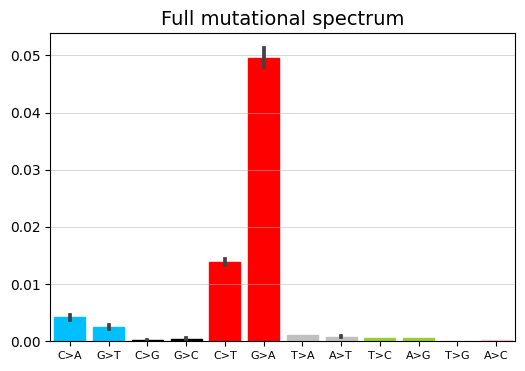

<AxesSubplot:title={'center':'Full mutational spectrum'}>

In [5]:
draw.plot_mutspec12(mutspec12, savepath='/home/gabs/Documents/lab/TermitesAndCockroaches/mtdna-mutspec-insecta/figures/midori_all_insects_mutspec/mutspec12.pdf')

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


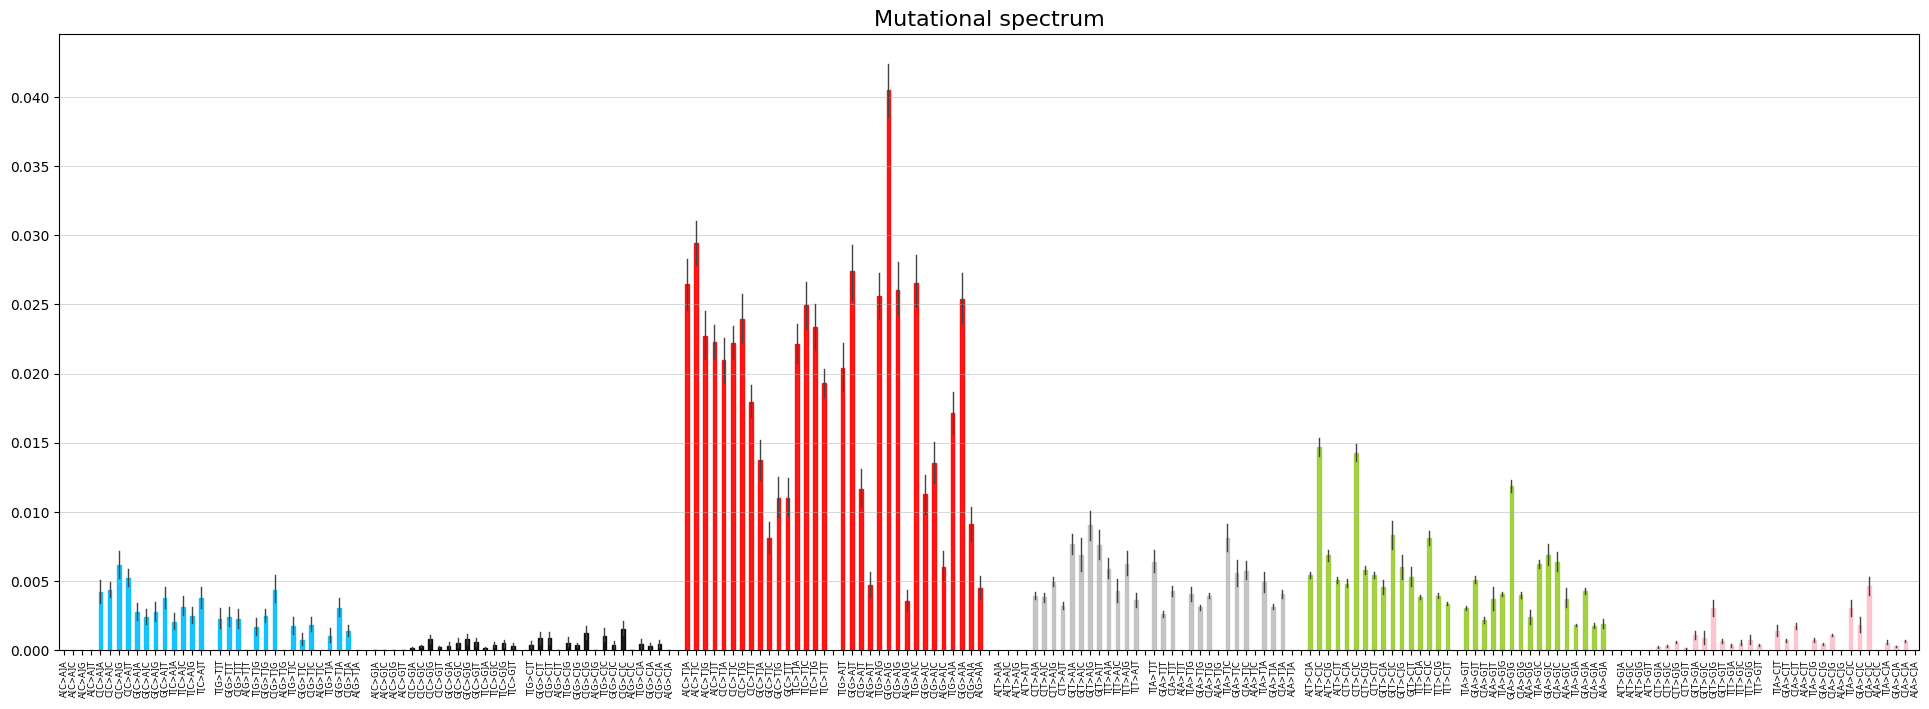

<AxesSubplot:title={'center':'Mutational spectrum'}>

In [6]:
draw.plot_mutspec192(mutspec192, savepath='/home/gabs/Documents/lab/TermitesAndCockroaches/mtdna-mutspec-insecta/figures/midori_all_insects_mutspec/mutspec192.pdf')

In [4]:
metadata = pd.read_csv(PATH_TO_METADATA, sep='\t', index_col=0)
blattodea_meta = metadata.loc[metadata['Order'] == 'Blattodea_85823']

In [5]:
terms_meta = [] 
terms_meta.append(blattodea_meta.loc[blattodea_meta['Family'] == 'Rhinotermitidae_36985'])
terms_meta.append(blattodea_meta.loc[blattodea_meta['Family'] == 'Termitidae_46569'])
terms_meta = pd.concat(terms_meta)
terms_meta.reset_index(inplace=True)

cocks_meta = []
cocks_meta.append(blattodea_meta.loc[blattodea_meta['Family'] == 'Blattidae_6974'])
cocks_meta.append(blattodea_meta.loc[blattodea_meta['Family'] == 'Cryptocercidae_36982'])
cocks_meta.append(blattodea_meta.loc[blattodea_meta['Family'] == 'Ectobiidae_1049651'])
cocks_meta = pd.concat(cocks_meta)
cocks_meta.reset_index(inplace=True)

In [6]:
terms_meta

,Species,Class,Order,Family,Genus,Nodes_in_tree
0,Reticulitermes_lucifugus,Insecta_50557,Blattodea_85823,Rhinotermitidae_36985,Reticulitermes_36988,10.0
1,Coptotermes_acinaciformis,Insecta_50557,Blattodea_85823,Rhinotermitidae_36985,Coptotermes_36986,61.0
2,Reticulitermes_urbis,Insecta_50557,Blattodea_85823,Rhinotermitidae_36985,Reticulitermes_36988,12.0
3,Coptotermes_gestroi,Insecta_50557,Blattodea_85823,Rhinotermitidae_36985,Coptotermes_36986,98.0
4,Reticulitermes_banyulensis,Insecta_50557,Blattodea_85823,Rhinotermitidae_36985,Reticulitermes_36988,19.0
5,Reticulitermes_flavipes,Insecta_50557,Blattodea_85823,Rhinotermitidae_36985,Reticulitermes_36988,40.0
6,Reticulitermes_grassei,Insecta_50557,Blattodea_85823,Rhinotermitidae_36985,Reticulitermes_36988,25.0
7,Reticulitermes_speratus,Insecta_50557,Blattodea_85823,Rhinotermitidae_36985,Reticulitermes_36988,19.0
8,Coptotermes_heimi,Insecta_50557,Blattodea_85823,Rhinotermitidae_36985,Coptotermes_36986,11.0
9,Reticulitermes_virginicus,Insecta_50557,Blattodea_85823,Rhinotermitidae_36985,Reticulitermes_36988,12.0


In [7]:
cocks_meta

,Species,Class,Order,Family,Genus,Nodes_in_tree
0,Periplaneta_fuliginosa,Insecta_50557,Blattodea_85823,Blattidae_6974,Periplaneta_6977,21.0
1,Periplaneta_americana,Insecta_50557,Blattodea_85823,Blattidae_6974,Periplaneta_6977,40.0
2,Cryptocercus_punctulatus,Insecta_50557,Blattodea_85823,Cryptocercidae_36982,Cryptocercus_36983,156.0
3,Cryptocercus_relictus,Insecta_50557,Blattodea_85823,Cryptocercidae_36982,Cryptocercus_36983,14.0
4,Blattella_bisignata,Insecta_50557,Blattodea_85823,Ectobiidae_1049651,Blattella_6972,21.0
5,Blattella_lituricollis,Insecta_50557,Blattodea_85823,Ectobiidae_1049651,Blattella_6972,16.0
6,Blattella_nipponica,Insecta_50557,Blattodea_85823,Ectobiidae_1049651,Blattella_6972,16.0
7,Blattella_germanica,Insecta_50557,Blattodea_85823,Ectobiidae_1049651,Blattella_6972,45.0


In [8]:
blattodea_codontable = pd.read_csv(PATH_TO_CODONTABLE, index_col=0)
blattodea_codontable['Species_name'] = list(map(lambda sp: f'{sp.split("_")[0]}_{sp.split("_")[1]}', blattodea_codontable['Species_name']))

term_codontable = []
for sp in terms_meta['Species']:
    term_codontable.append(blattodea_codontable.loc[blattodea_codontable['Species_name'] == sp])
term_codontable = pd.concat(term_codontable)

cocks_codontable = []
for sp in cocks_meta['Species']:
    cocks_codontable.append(blattodea_codontable.loc[blattodea_codontable['Species_name'] == sp])
cocks_codontable = pd.concat(cocks_codontable)

Text(0.5, 1.0, 'Nucleotide content of Blattodea')

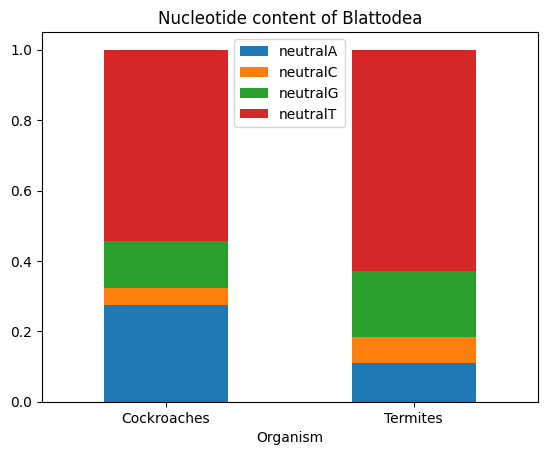

In [9]:

def get_codontable(codontable, organism):
    
    codontable.rename(columns={'neutralA' : 'neutralT', 'neutralT' : 'neutralA', 'neutralG' : 'neutralC', 'neutralC' : 'neutralG'}, inplace=True) # invertion

    atgc_table = codontable.agg({'neutralA' : 'sum', 'neutralT' : 'sum', 'neutralG' : 'sum', 'neutralC' : 'sum'}).to_frame(name='count')
    atgc_table['Organism'] = organism
    atgc_table['normalized_count'] = np.nan
    atgc_table.at['neutralA', 'normalized_count'] = atgc_table.at['neutralA', 'count'] / atgc_table['count'].sum()
    atgc_table.at['neutralT', 'normalized_count'] = atgc_table.at['neutralT', 'count'] / atgc_table['count'].sum()
    atgc_table.at['neutralG', 'normalized_count'] = atgc_table.at['neutralG', 'count'] / atgc_table['count'].sum()
    atgc_table.at['neutralC', 'normalized_count'] = atgc_table.at['neutralC', 'count'] / atgc_table['count'].sum()
    return atgc_table

atgc_table = pd.concat([get_codontable(cocks_codontable, 'Cockroaches'), get_codontable(term_codontable, 'Termites')])

pivoted = pd.pivot_table(atgc_table, columns=atgc_table.index, index=['Organism'])
pivoted = pivoted.drop(columns=['count'])
pivoted.columns = pivoted.columns.droplevel()

pivoted.plot(kind='bar', stacked=True)
plt.legend(loc='upper center')
plt.xticks(rotation = 0)
plt.title('Nucleotide content of Blattodea')

In [10]:
cocks_mutspec12 = []
for sp in cocks_meta['Species']:
    cocks_mutspec12.append(mutspec12.loc[mutspec12['Species'] == sp])
cocks_mutspec12 = pd.concat(cocks_mutspec12)

terms_mutspec12 = []
for sp in terms_meta['Species']:
    terms_mutspec12.append(mutspec12.loc[mutspec12['Species'] == sp])
terms_mutspec12 = pd.concat(terms_mutspec12)

In [11]:
cocks_mutspec12.to_csv('cock_ms12.csv', index=False)
terms_mutspec12.to_csv('term_ms12.csv', index=False)

In [12]:
cocks_TC = cocks_mutspec12[cocks_mutspec12['Mut'] == 'T>C']
term_TC = terms_mutspec12[terms_mutspec12['Mut'] == 'T>C']
cocks_AG = cocks_mutspec12[cocks_mutspec12['Mut'] == 'A>G']
term_AG = terms_mutspec12[terms_mutspec12['Mut'] == 'A>G']

In [13]:
ttest_ind(term_TC['MutSpec'], cocks_TC['MutSpec'])

TtestResult(statistic=0.3452964699264137, pvalue=0.733009519519739, df=23.0)

In [14]:
ttest_ind(term_AG['MutSpec'], cocks_AG['MutSpec'])

TtestResult(statistic=2.9040285425263503, pvalue=0.007996516154258976, df=23.0)

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


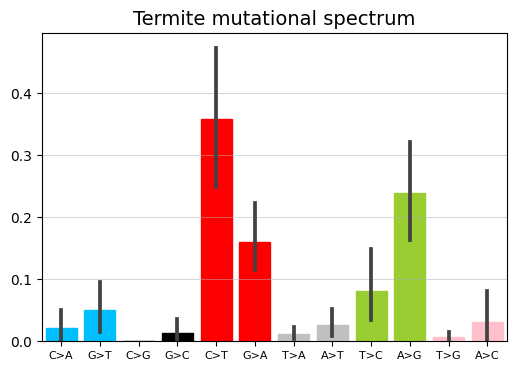

<AxesSubplot:title={'center':'Termite mutational spectrum'}>

In [15]:
draw.plot_mutspec12(terms_mutspec12, title='Termite mutational spectrum')

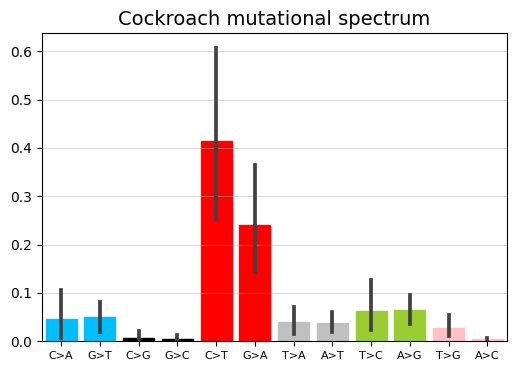

<AxesSubplot:title={'center':'Cockroach mutational spectrum'}>

In [16]:
draw.plot_mutspec12(cocks_mutspec12, title='Cockroach mutational spectrum')
